In [40]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [155]:
data_dir = "/om2/group/halassa/PFCMD-ali-sabrina/011921_file-per-trial/by_trial"
s_trial = 1999
t_trial = 2499

# each neuron's activity is a row; column index is trial number
trial_means_PFC = np.array([])
trial_means_MD = np.array([])
    
for i in range(s_trial, t_trial+1):
    with open(data_dir + "/" + str(i) + ".json") as json_file:
        data = json.load(json_file)
        r_MD = np.array(data["network_rates"]["r_MD"])
        MD_input = np.array(data["network_rates"]["MD_input"])
        r_PFC = np.array(data["network_rates"]["r_PFC"])
    
        mean_PFC = np.mean(r_PFC, axis=0).reshape(-1,1)
        mean_MD = np.mean(r_MD, axis=0).reshape(-1,1)
        
        if i == s_trial:
            trial_means_PFC = mean_PFC
            trial_means_MD = mean_MD
        else:
            trial_means_PFC = np.hstack((trial_means_PFC, mean_PFC))
            trial_means_MD = np.hstack((trial_means_MD, mean_MD))


In [156]:
save_dir = "/om2/group/halassa/PFCMD-ali-sabrina/011921_file-per-trial/plots/PFC-MD-rate-scatter_whole-trial/"
for i in range(0, len(trial_means_PFC[:]), 15):
    fig, ax = plt.subplots(1, 3, figsize=(15, 3))
    # Plot MD vs PFC activity
    ax[0].scatter(trial_means_MD[0,:], trial_means_PFC[i,:], s=15, c='blue', linewidths=0.0)
    ax[0].scatter(trial_means_MD[1,:], trial_means_PFC[i,:], s=15, c='orange', linewidths=0.0)
    ax[0].set_xlabel("mean(PFC neuron activity)")
    ax[0].set_ylabel("mean(MD neuron activity)")
    # Plot PFC activity over trials
    ax[1].plot(trial_means_PFC[i,:], c="grey")
    ax[1].set_xlabel("trial # + 2000")
    ax[1].set_ylabel("PFC neuron avg activity")
    # Plot MD activity over trials
    ax[2].plot(trial_means_MD[0,:], c="blue")
    ax[2].plot(trial_means_MD[1,:], c="orange")
    ax[2].set_xlabel("trial # + 2000")
    ax[2].set_ylabel("MD neuron avg activity")
    plt.savefig(save_dir + str(i) + ".png" )
    plt.clf()


/cm/shared/openmind/anaconda/2.5.0/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


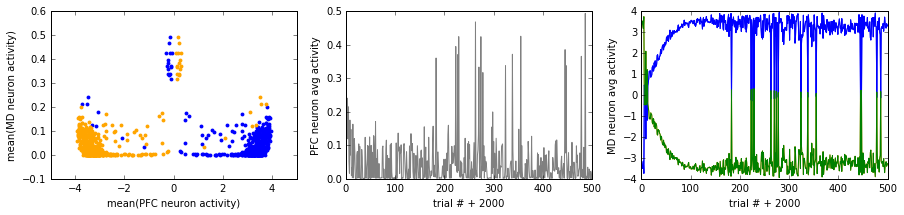

In [149]:
# Why is this the case?
plt.plot(trial_means_MD[0,:])
plt.plot(trial_means_MD[1,:])
plt.show()

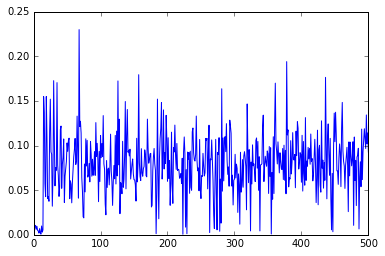

In [127]:
plt.plot(trial_means_PFC[400,:])
plt.show()